In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sentence_transformers import SentenceTransformer, util
from scipy.spatial import cKDTree
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
import pickle
import re
from utils.normalizor import normalizor
import tqdm
import math

C:\Users\johnn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
model = SentenceTransformer('all-roberta-large-v1')
# model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
# model.load_state_dict(torch.load('model1.pt'))

In [9]:
correct = 0
dif = 0
mp = {}
ma = 0

plotx = []
ploty = []

In [10]:
tree : cKDTree
Comments = []

with open("data/data.pkl", "rb") as f:
    raw = pickle.load(f)
    tree = pickle.loads(raw)

with open("data/comments.pkl", "rb") as f:
    Comments = pickle.load(f)

In [11]:
import string
for num, (position, comment) in enumerate(Comments):

    q = tree.query(normalizor(model.encode(position, convert_to_tensor=False)), 1)[1]

    miny = abs(q - num)
    if abs(q - num) < len(Comments) / 100:
        correct += 1

    plotx.append(num)
    ploty.append(miny)
    if num % 100 == 1:
        print("[{}/{}]({:.2f}%) correct:{}(rate:{:.2f}%)".format(num, len(Comments), num/len(Comments)*100, correct, correct / (num + 1) * 100))

print('{:.2f}%'.format(correct / len(Comments) * 100))

[1/16371](0.01%) correct:1(rate:50.00%)
[101/16371](0.62%) correct:20(rate:19.61%)
[201/16371](1.23%) correct:64(rate:31.68%)
[301/16371](1.84%) correct:98(rate:32.45%)
[401/16371](2.45%) correct:134(rate:33.33%)
[501/16371](3.06%) correct:162(rate:32.27%)
[601/16371](3.67%) correct:205(rate:34.05%)
[701/16371](4.28%) correct:258(rate:36.75%)
[801/16371](4.89%) correct:303(rate:37.78%)
[901/16371](5.50%) correct:365(rate:40.47%)
[1001/16371](6.11%) correct:401(rate:40.02%)
[1101/16371](6.73%) correct:462(rate:41.92%)
[1201/16371](7.34%) correct:500(rate:41.60%)
[1301/16371](7.95%) correct:536(rate:41.17%)
[1401/16371](8.56%) correct:586(rate:41.80%)
[1501/16371](9.17%) correct:621(rate:41.34%)
[1601/16371](9.78%) correct:681(rate:42.51%)
[1701/16371](10.39%) correct:702(rate:41.25%)
[1801/16371](11.00%) correct:716(rate:39.73%)
[1901/16371](11.61%) correct:724(rate:38.07%)
[2001/16371](12.22%) correct:753(rate:37.61%)
[2101/16371](12.83%) correct:785(rate:37.35%)
[2201/16371](13.44%) c

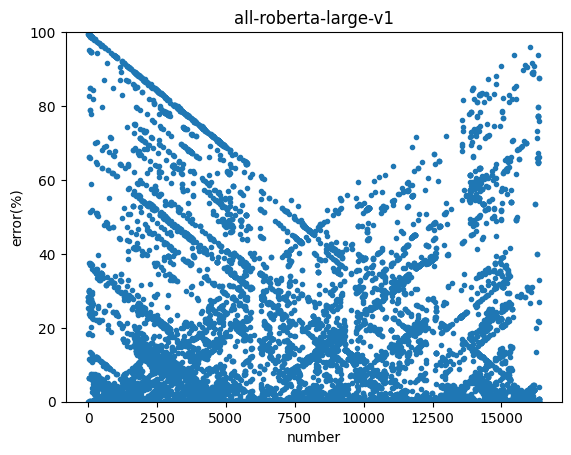

In [12]:
y = [y / len(Comments) * 100 for y in ploty]
plt.plot(plotx, y, '.')
plt.ylim(0, 100)
plt.xlabel("number")
plt.ylabel("error(%)")
plt.title("all-roberta-large-v1")
plt.show()